# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = 'data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

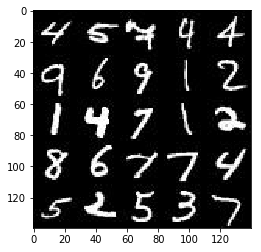

In [2]:
import helper
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

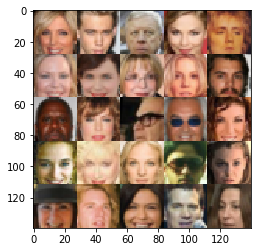

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32,shape = (None,image_width, image_height, 
                                             image_channels),name='real_inputs')
    z_inputs = tf.placeholder(tf.float32,shape = (None,z_dim), name='z_inputs')
    lr = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_inputs, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer = tf.random_normal_initializer(stddev=0.05))
        lrelu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(lrelu1, 256, 5, strides=2, padding='same',kernel_initializer = tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        lrelu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(lrelu2, 512, 5, strides=2, padding='same',kernel_initializer = tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        lrelu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(lrelu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
       
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        
        out = tf.tanh(logits)
        
  
    return out 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6188... Generator Loss: 1.7702
Epoch 1/2... Discriminator Loss: 1.8352... Generator Loss: 0.9594
Epoch 1/2... Discriminator Loss: 0.5345... Generator Loss: 3.1268
Epoch 1/2... Discriminator Loss: 1.2130... Generator Loss: 3.2604
Epoch 1/2... Discriminator Loss: 1.7205... Generator Loss: 0.6443
Epoch 1/2... Discriminator Loss: 1.1358... Generator Loss: 1.7427
Epoch 1/2... Discriminator Loss: 1.2625... Generator Loss: 0.7369
Epoch 1/2... Discriminator Loss: 1.3702... Generator Loss: 2.4790
Epoch 1/2... Discriminator Loss: 1.3570... Generator Loss: 1.1449
Epoch 1/2... Discriminator Loss: 1.5810... Generator Loss: 1.7063


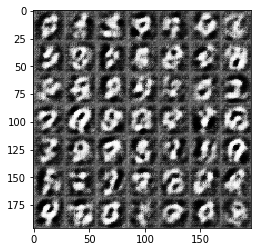

Epoch 1/2... Discriminator Loss: 1.2325... Generator Loss: 1.5634
Epoch 1/2... Discriminator Loss: 1.2478... Generator Loss: 0.6552
Epoch 1/2... Discriminator Loss: 1.0592... Generator Loss: 1.2658
Epoch 1/2... Discriminator Loss: 1.6272... Generator Loss: 1.4718
Epoch 1/2... Discriminator Loss: 1.4134... Generator Loss: 0.6139
Epoch 1/2... Discriminator Loss: 1.1257... Generator Loss: 0.8106
Epoch 1/2... Discriminator Loss: 1.1093... Generator Loss: 1.0601
Epoch 1/2... Discriminator Loss: 1.3110... Generator Loss: 1.3039
Epoch 1/2... Discriminator Loss: 1.4765... Generator Loss: 0.4634
Epoch 1/2... Discriminator Loss: 1.0367... Generator Loss: 1.3082


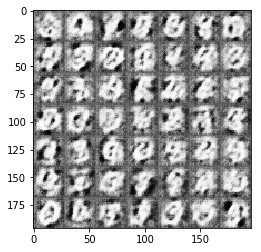

Epoch 1/2... Discriminator Loss: 1.0009... Generator Loss: 1.2356
Epoch 1/2... Discriminator Loss: 0.9872... Generator Loss: 1.3561
Epoch 1/2... Discriminator Loss: 1.0714... Generator Loss: 1.1659
Epoch 1/2... Discriminator Loss: 1.1173... Generator Loss: 1.7586
Epoch 1/2... Discriminator Loss: 1.6197... Generator Loss: 0.4377
Epoch 1/2... Discriminator Loss: 1.0180... Generator Loss: 2.0007
Epoch 1/2... Discriminator Loss: 1.6055... Generator Loss: 0.4293
Epoch 1/2... Discriminator Loss: 1.2452... Generator Loss: 0.6630
Epoch 1/2... Discriminator Loss: 1.2120... Generator Loss: 0.6795
Epoch 1/2... Discriminator Loss: 1.2185... Generator Loss: 0.7073


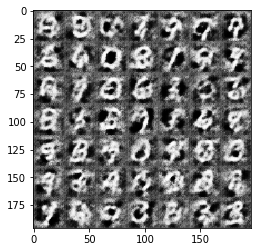

Epoch 1/2... Discriminator Loss: 1.9271... Generator Loss: 0.2808
Epoch 1/2... Discriminator Loss: 1.5582... Generator Loss: 0.4953
Epoch 1/2... Discriminator Loss: 1.4325... Generator Loss: 0.5624
Epoch 1/2... Discriminator Loss: 1.3221... Generator Loss: 0.5971
Epoch 1/2... Discriminator Loss: 2.0425... Generator Loss: 3.2009
Epoch 1/2... Discriminator Loss: 1.2405... Generator Loss: 1.3164
Epoch 1/2... Discriminator Loss: 1.1984... Generator Loss: 1.7881
Epoch 1/2... Discriminator Loss: 1.1403... Generator Loss: 0.7562
Epoch 1/2... Discriminator Loss: 1.2757... Generator Loss: 1.5018
Epoch 1/2... Discriminator Loss: 1.0972... Generator Loss: 1.0635


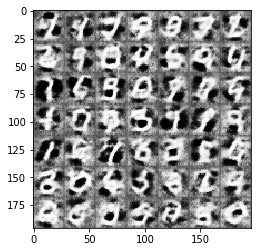

Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 0.7215
Epoch 1/2... Discriminator Loss: 1.1440... Generator Loss: 1.0639
Epoch 1/2... Discriminator Loss: 1.1358... Generator Loss: 0.8941
Epoch 1/2... Discriminator Loss: 1.1153... Generator Loss: 0.7818
Epoch 1/2... Discriminator Loss: 1.0020... Generator Loss: 1.1736
Epoch 1/2... Discriminator Loss: 1.4353... Generator Loss: 0.4708
Epoch 1/2... Discriminator Loss: 1.2440... Generator Loss: 1.3173
Epoch 1/2... Discriminator Loss: 1.0207... Generator Loss: 0.9597
Epoch 1/2... Discriminator Loss: 1.1591... Generator Loss: 0.9822
Epoch 1/2... Discriminator Loss: 1.2896... Generator Loss: 1.4406


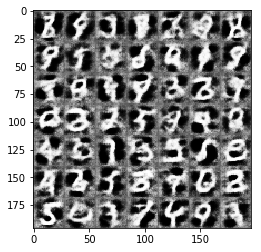

Epoch 1/2... Discriminator Loss: 1.3372... Generator Loss: 1.8342
Epoch 1/2... Discriminator Loss: 0.9925... Generator Loss: 1.3171
Epoch 1/2... Discriminator Loss: 1.3044... Generator Loss: 2.0158
Epoch 1/2... Discriminator Loss: 1.3716... Generator Loss: 0.5422
Epoch 1/2... Discriminator Loss: 1.6508... Generator Loss: 0.3783
Epoch 1/2... Discriminator Loss: 1.4381... Generator Loss: 0.5357
Epoch 1/2... Discriminator Loss: 1.3843... Generator Loss: 0.5496
Epoch 1/2... Discriminator Loss: 1.1830... Generator Loss: 1.3814
Epoch 1/2... Discriminator Loss: 1.0976... Generator Loss: 1.0621
Epoch 1/2... Discriminator Loss: 1.2952... Generator Loss: 0.6436


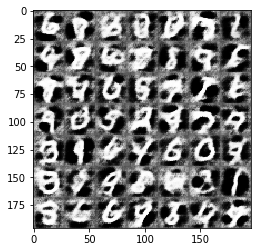

Epoch 1/2... Discriminator Loss: 1.1485... Generator Loss: 0.7597
Epoch 1/2... Discriminator Loss: 1.4296... Generator Loss: 0.5034
Epoch 1/2... Discriminator Loss: 1.0292... Generator Loss: 1.0584
Epoch 1/2... Discriminator Loss: 1.1962... Generator Loss: 0.7243
Epoch 1/2... Discriminator Loss: 1.4620... Generator Loss: 0.4833
Epoch 1/2... Discriminator Loss: 1.5498... Generator Loss: 0.4266
Epoch 1/2... Discriminator Loss: 1.1729... Generator Loss: 0.7169
Epoch 1/2... Discriminator Loss: 1.1057... Generator Loss: 1.1202
Epoch 1/2... Discriminator Loss: 1.2666... Generator Loss: 0.6477
Epoch 1/2... Discriminator Loss: 1.1304... Generator Loss: 0.8504


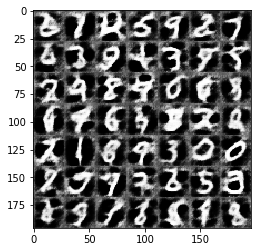

Epoch 1/2... Discriminator Loss: 1.1100... Generator Loss: 0.8516
Epoch 1/2... Discriminator Loss: 1.0051... Generator Loss: 0.9964
Epoch 1/2... Discriminator Loss: 1.8456... Generator Loss: 2.7829
Epoch 1/2... Discriminator Loss: 1.0463... Generator Loss: 1.4099
Epoch 1/2... Discriminator Loss: 1.0121... Generator Loss: 1.1222
Epoch 1/2... Discriminator Loss: 1.0750... Generator Loss: 1.2688
Epoch 1/2... Discriminator Loss: 1.0332... Generator Loss: 1.3792
Epoch 1/2... Discriminator Loss: 1.0251... Generator Loss: 1.3309
Epoch 1/2... Discriminator Loss: 1.0339... Generator Loss: 0.8357
Epoch 1/2... Discriminator Loss: 1.0467... Generator Loss: 1.1584


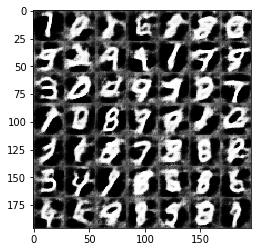

Epoch 1/2... Discriminator Loss: 1.1456... Generator Loss: 0.7463
Epoch 1/2... Discriminator Loss: 1.4575... Generator Loss: 0.4797
Epoch 1/2... Discriminator Loss: 1.0565... Generator Loss: 1.0315
Epoch 1/2... Discriminator Loss: 1.0901... Generator Loss: 0.7515
Epoch 1/2... Discriminator Loss: 1.0383... Generator Loss: 1.1339
Epoch 1/2... Discriminator Loss: 1.1218... Generator Loss: 1.8071
Epoch 1/2... Discriminator Loss: 1.2350... Generator Loss: 0.6072
Epoch 1/2... Discriminator Loss: 1.1815... Generator Loss: 0.6967
Epoch 1/2... Discriminator Loss: 2.2248... Generator Loss: 0.2308
Epoch 1/2... Discriminator Loss: 1.1693... Generator Loss: 0.8345


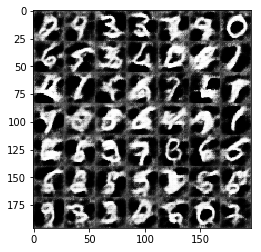

Epoch 1/2... Discriminator Loss: 1.0223... Generator Loss: 1.0055
Epoch 1/2... Discriminator Loss: 1.1304... Generator Loss: 0.7933
Epoch 1/2... Discriminator Loss: 0.8791... Generator Loss: 1.1604
Epoch 2/2... Discriminator Loss: 1.0285... Generator Loss: 0.9602
Epoch 2/2... Discriminator Loss: 1.1559... Generator Loss: 1.9915
Epoch 2/2... Discriminator Loss: 1.0577... Generator Loss: 1.3085
Epoch 2/2... Discriminator Loss: 1.0289... Generator Loss: 0.8500
Epoch 2/2... Discriminator Loss: 1.4324... Generator Loss: 0.5051
Epoch 2/2... Discriminator Loss: 1.0338... Generator Loss: 1.9724
Epoch 2/2... Discriminator Loss: 1.4810... Generator Loss: 0.4670


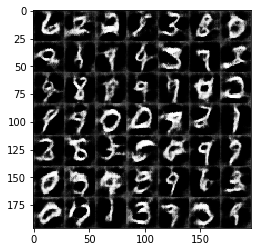

Epoch 2/2... Discriminator Loss: 3.2295... Generator Loss: 0.1053
Epoch 2/2... Discriminator Loss: 1.0497... Generator Loss: 0.9342
Epoch 2/2... Discriminator Loss: 0.9839... Generator Loss: 1.0211
Epoch 2/2... Discriminator Loss: 0.9699... Generator Loss: 1.2353
Epoch 2/2... Discriminator Loss: 1.0937... Generator Loss: 0.8394
Epoch 2/2... Discriminator Loss: 0.9356... Generator Loss: 1.1765
Epoch 2/2... Discriminator Loss: 0.9806... Generator Loss: 1.4249
Epoch 2/2... Discriminator Loss: 1.4192... Generator Loss: 3.7644
Epoch 2/2... Discriminator Loss: 1.9865... Generator Loss: 0.2796
Epoch 2/2... Discriminator Loss: 1.0372... Generator Loss: 1.5247


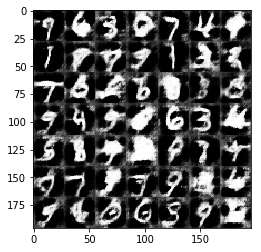

Epoch 2/2... Discriminator Loss: 1.0838... Generator Loss: 0.9362
Epoch 2/2... Discriminator Loss: 0.9701... Generator Loss: 1.8136
Epoch 2/2... Discriminator Loss: 1.1029... Generator Loss: 0.7044
Epoch 2/2... Discriminator Loss: 1.2181... Generator Loss: 0.6803
Epoch 2/2... Discriminator Loss: 2.1340... Generator Loss: 0.3432
Epoch 2/2... Discriminator Loss: 1.2287... Generator Loss: 0.6719
Epoch 2/2... Discriminator Loss: 1.0723... Generator Loss: 1.8042
Epoch 2/2... Discriminator Loss: 0.8634... Generator Loss: 1.4522
Epoch 2/2... Discriminator Loss: 1.7107... Generator Loss: 2.7362
Epoch 2/2... Discriminator Loss: 1.1441... Generator Loss: 1.9120


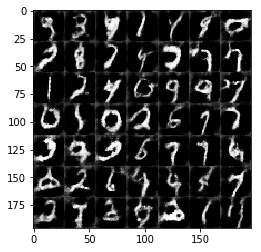

Epoch 2/2... Discriminator Loss: 1.0158... Generator Loss: 0.8978
Epoch 2/2... Discriminator Loss: 1.6788... Generator Loss: 0.5073
Epoch 2/2... Discriminator Loss: 1.1399... Generator Loss: 0.8239
Epoch 2/2... Discriminator Loss: 0.9028... Generator Loss: 1.2149
Epoch 2/2... Discriminator Loss: 0.8797... Generator Loss: 1.2876
Epoch 2/2... Discriminator Loss: 0.9077... Generator Loss: 2.0883
Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 2.1868
Epoch 2/2... Discriminator Loss: 0.9550... Generator Loss: 1.1035
Epoch 2/2... Discriminator Loss: 0.9975... Generator Loss: 1.1285
Epoch 2/2... Discriminator Loss: 1.5250... Generator Loss: 0.4739


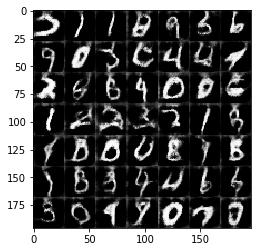

Epoch 2/2... Discriminator Loss: 1.0385... Generator Loss: 0.8979
Epoch 2/2... Discriminator Loss: 2.6008... Generator Loss: 0.1514
Epoch 2/2... Discriminator Loss: 1.0790... Generator Loss: 1.9062
Epoch 2/2... Discriminator Loss: 0.9853... Generator Loss: 1.0847
Epoch 2/2... Discriminator Loss: 1.1579... Generator Loss: 0.6981
Epoch 2/2... Discriminator Loss: 0.9358... Generator Loss: 1.1616
Epoch 2/2... Discriminator Loss: 1.5624... Generator Loss: 0.5058
Epoch 2/2... Discriminator Loss: 1.5470... Generator Loss: 0.4287
Epoch 2/2... Discriminator Loss: 1.3235... Generator Loss: 0.5917
Epoch 2/2... Discriminator Loss: 0.8665... Generator Loss: 1.2968


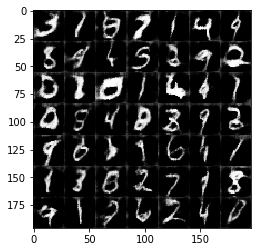

Epoch 2/2... Discriminator Loss: 0.8502... Generator Loss: 1.6727
Epoch 2/2... Discriminator Loss: 1.0057... Generator Loss: 1.7415
Epoch 2/2... Discriminator Loss: 1.4324... Generator Loss: 2.6218
Epoch 2/2... Discriminator Loss: 0.8363... Generator Loss: 1.2549
Epoch 2/2... Discriminator Loss: 2.4690... Generator Loss: 0.2104
Epoch 2/2... Discriminator Loss: 1.1065... Generator Loss: 0.8331
Epoch 2/2... Discriminator Loss: 0.8592... Generator Loss: 1.0817
Epoch 2/2... Discriminator Loss: 1.3439... Generator Loss: 0.5797
Epoch 2/2... Discriminator Loss: 0.8686... Generator Loss: 1.5122
Epoch 2/2... Discriminator Loss: 1.1412... Generator Loss: 2.3541


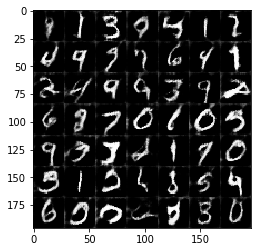

Epoch 2/2... Discriminator Loss: 1.3100... Generator Loss: 0.6010
Epoch 2/2... Discriminator Loss: 0.9836... Generator Loss: 0.9626
Epoch 2/2... Discriminator Loss: 1.7717... Generator Loss: 0.3910
Epoch 2/2... Discriminator Loss: 1.6316... Generator Loss: 0.4111
Epoch 2/2... Discriminator Loss: 1.2724... Generator Loss: 0.6594
Epoch 2/2... Discriminator Loss: 0.8289... Generator Loss: 1.2837
Epoch 2/2... Discriminator Loss: 0.8908... Generator Loss: 1.2369
Epoch 2/2... Discriminator Loss: 0.7436... Generator Loss: 1.6914
Epoch 2/2... Discriminator Loss: 1.2197... Generator Loss: 0.7051
Epoch 2/2... Discriminator Loss: 2.1302... Generator Loss: 0.2547


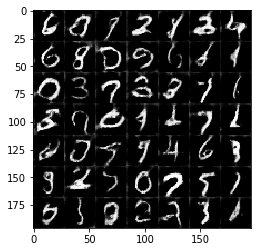

Epoch 2/2... Discriminator Loss: 1.3905... Generator Loss: 0.5666
Epoch 2/2... Discriminator Loss: 0.9853... Generator Loss: 1.6368
Epoch 2/2... Discriminator Loss: 1.0840... Generator Loss: 0.7970
Epoch 2/2... Discriminator Loss: 1.4496... Generator Loss: 0.4913
Epoch 2/2... Discriminator Loss: 1.0332... Generator Loss: 1.0486
Epoch 2/2... Discriminator Loss: 0.8980... Generator Loss: 1.5526
Epoch 2/2... Discriminator Loss: 0.8983... Generator Loss: 1.0343
Epoch 2/2... Discriminator Loss: 0.8172... Generator Loss: 1.7283
Epoch 2/2... Discriminator Loss: 1.3395... Generator Loss: 0.6928
Epoch 2/2... Discriminator Loss: 1.2669... Generator Loss: 0.6809


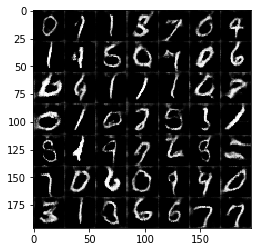

Epoch 2/2... Discriminator Loss: 1.0074... Generator Loss: 0.8959
Epoch 2/2... Discriminator Loss: 0.8720... Generator Loss: 1.2356
Epoch 2/2... Discriminator Loss: 0.8004... Generator Loss: 1.2467
Epoch 2/2... Discriminator Loss: 0.8557... Generator Loss: 1.4442
Epoch 2/2... Discriminator Loss: 1.2108... Generator Loss: 0.7210
Epoch 2/2... Discriminator Loss: 1.3298... Generator Loss: 3.1709
Epoch 2/2... Discriminator Loss: 0.8828... Generator Loss: 1.4594
Epoch 2/2... Discriminator Loss: 0.8115... Generator Loss: 1.3194
Epoch 2/2... Discriminator Loss: 1.2419... Generator Loss: 3.3063
Epoch 2/2... Discriminator Loss: 0.9055... Generator Loss: 1.9435


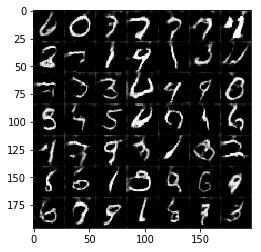

Epoch 2/2... Discriminator Loss: 0.8080... Generator Loss: 1.6171
Epoch 2/2... Discriminator Loss: 0.9157... Generator Loss: 1.4676
Epoch 2/2... Discriminator Loss: 1.1250... Generator Loss: 0.7275
Epoch 2/2... Discriminator Loss: 0.8324... Generator Loss: 1.6686
Epoch 2/2... Discriminator Loss: 0.9516... Generator Loss: 1.8464
Epoch 2/2... Discriminator Loss: 1.6811... Generator Loss: 3.4360
Epoch 2/2... Discriminator Loss: 1.5009... Generator Loss: 0.4726


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6169... Generator Loss: 0.7165
Epoch 1/1... Discriminator Loss: 2.5388... Generator Loss: 0.2117
Epoch 1/1... Discriminator Loss: 1.5792... Generator Loss: 0.4895
Epoch 1/1... Discriminator Loss: 0.9300... Generator Loss: 1.1698
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.2230
Epoch 1/1... Discriminator Loss: 2.1345... Generator Loss: 7.8877
Epoch 1/1... Discriminator Loss: 0.7742... Generator Loss: 1.8423
Epoch 1/1... Discriminator Loss: 0.8071... Generator Loss: 1.8557
Epoch 1/1... Discriminator Loss: 1.3254... Generator Loss: 4.9492
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 5.3556


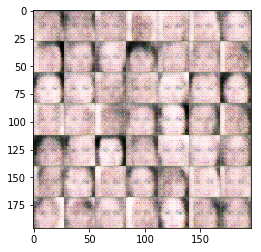

Epoch 1/1... Discriminator Loss: 0.5708... Generator Loss: 2.1349
Epoch 1/1... Discriminator Loss: 0.7383... Generator Loss: 3.6719
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 3.6408
Epoch 1/1... Discriminator Loss: 0.8117... Generator Loss: 2.1959
Epoch 1/1... Discriminator Loss: 2.7375... Generator Loss: 0.1696
Epoch 1/1... Discriminator Loss: 1.2097... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 0.5953... Generator Loss: 2.3712
Epoch 1/1... Discriminator Loss: 1.8993... Generator Loss: 4.2951
Epoch 1/1... Discriminator Loss: 0.5017... Generator Loss: 2.5924
Epoch 1/1... Discriminator Loss: 1.7508... Generator Loss: 3.7423


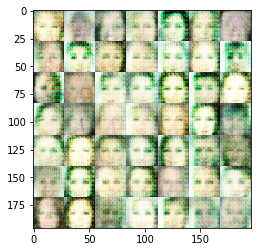

Epoch 1/1... Discriminator Loss: 1.2471... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.6411... Generator Loss: 0.4854
Epoch 1/1... Discriminator Loss: 2.1254... Generator Loss: 0.2352
Epoch 1/1... Discriminator Loss: 2.5681... Generator Loss: 0.1409
Epoch 1/1... Discriminator Loss: 0.9587... Generator Loss: 1.2633
Epoch 1/1... Discriminator Loss: 1.2272... Generator Loss: 0.7074
Epoch 1/1... Discriminator Loss: 1.7062... Generator Loss: 0.3999
Epoch 1/1... Discriminator Loss: 0.6373... Generator Loss: 2.1346
Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 4.8187
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.6531


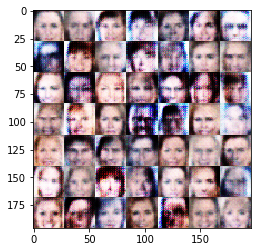

Epoch 1/1... Discriminator Loss: 0.8138... Generator Loss: 2.8364
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 4.0095
Epoch 1/1... Discriminator Loss: 0.7315... Generator Loss: 1.4306
Epoch 1/1... Discriminator Loss: 2.5905... Generator Loss: 0.1365
Epoch 1/1... Discriminator Loss: 1.5784... Generator Loss: 0.4087
Epoch 1/1... Discriminator Loss: 0.4553... Generator Loss: 2.5815
Epoch 1/1... Discriminator Loss: 0.8152... Generator Loss: 2.6458
Epoch 1/1... Discriminator Loss: 0.7082... Generator Loss: 1.4103
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.5660
Epoch 1/1... Discriminator Loss: 0.4103... Generator Loss: 3.2748


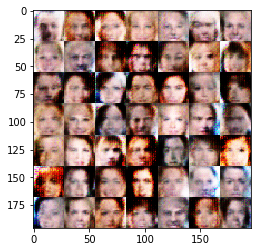

Epoch 1/1... Discriminator Loss: 0.4370... Generator Loss: 2.9437
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 1.3832
Epoch 1/1... Discriminator Loss: 0.6479... Generator Loss: 1.8373
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 0.7653
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 1.1604
Epoch 1/1... Discriminator Loss: 1.1531... Generator Loss: 0.8791
Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 2.8055
Epoch 1/1... Discriminator Loss: 0.9167... Generator Loss: 0.9971
Epoch 1/1... Discriminator Loss: 1.1662... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.7486... Generator Loss: 5.8923


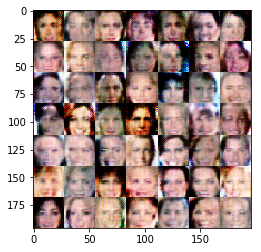

Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.5491
Epoch 1/1... Discriminator Loss: 0.8065... Generator Loss: 1.3529
Epoch 1/1... Discriminator Loss: 0.8470... Generator Loss: 1.2183
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.5780
Epoch 1/1... Discriminator Loss: 1.0104... Generator Loss: 0.9285
Epoch 1/1... Discriminator Loss: 0.8110... Generator Loss: 1.1940
Epoch 1/1... Discriminator Loss: 1.9328... Generator Loss: 0.2654
Epoch 1/1... Discriminator Loss: 0.5717... Generator Loss: 3.4289
Epoch 1/1... Discriminator Loss: 0.6903... Generator Loss: 3.2538
Epoch 1/1... Discriminator Loss: 0.6624... Generator Loss: 2.6005


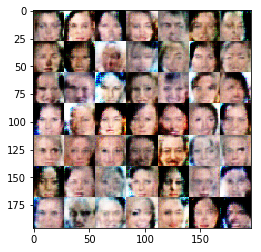

Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 3.5091
Epoch 1/1... Discriminator Loss: 0.8461... Generator Loss: 3.4516
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 1.4830
Epoch 1/1... Discriminator Loss: 0.7849... Generator Loss: 1.2196
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.4492
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 0.7140... Generator Loss: 3.4319
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 1.2369
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.5078


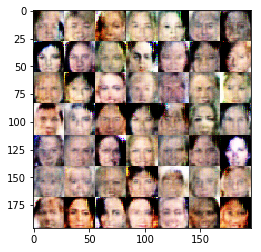

Epoch 1/1... Discriminator Loss: 1.5852... Generator Loss: 3.4982
Epoch 1/1... Discriminator Loss: 0.5277... Generator Loss: 2.3027
Epoch 1/1... Discriminator Loss: 1.0145... Generator Loss: 1.0120
Epoch 1/1... Discriminator Loss: 0.7066... Generator Loss: 3.0981
Epoch 1/1... Discriminator Loss: 0.6524... Generator Loss: 1.6130
Epoch 1/1... Discriminator Loss: 0.8335... Generator Loss: 1.3100
Epoch 1/1... Discriminator Loss: 0.7134... Generator Loss: 1.3665
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.5403
Epoch 1/1... Discriminator Loss: 1.1293... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 0.6850... Generator Loss: 1.7712


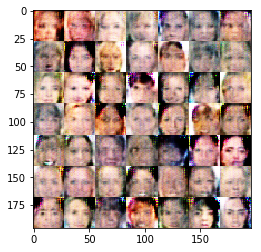

Epoch 1/1... Discriminator Loss: 0.6647... Generator Loss: 3.2271
Epoch 1/1... Discriminator Loss: 1.4932... Generator Loss: 0.4629
Epoch 1/1... Discriminator Loss: 0.9595... Generator Loss: 1.6160
Epoch 1/1... Discriminator Loss: 0.8311... Generator Loss: 1.6814
Epoch 1/1... Discriminator Loss: 0.6146... Generator Loss: 5.3907
Epoch 1/1... Discriminator Loss: 0.6026... Generator Loss: 2.6116
Epoch 1/1... Discriminator Loss: 0.8226... Generator Loss: 2.3422
Epoch 1/1... Discriminator Loss: 0.8917... Generator Loss: 1.0531
Epoch 1/1... Discriminator Loss: 0.5824... Generator Loss: 3.4408
Epoch 1/1... Discriminator Loss: 1.9746... Generator Loss: 0.2779


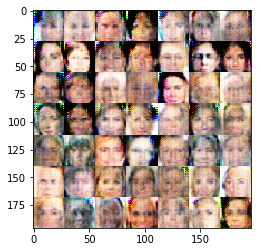

Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.5160
Epoch 1/1... Discriminator Loss: 1.0581... Generator Loss: 0.8143
Epoch 1/1... Discriminator Loss: 0.5548... Generator Loss: 2.3854
Epoch 1/1... Discriminator Loss: 0.7080... Generator Loss: 1.9636
Epoch 1/1... Discriminator Loss: 1.4785... Generator Loss: 0.4689
Epoch 1/1... Discriminator Loss: 0.6390... Generator Loss: 1.6404
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 2.1131
Epoch 1/1... Discriminator Loss: 0.6439... Generator Loss: 1.9791
Epoch 1/1... Discriminator Loss: 0.6881... Generator Loss: 2.0326


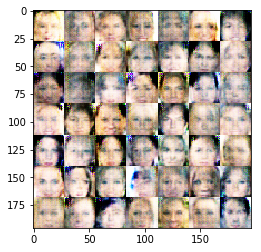

Epoch 1/1... Discriminator Loss: 1.2003... Generator Loss: 2.2298
Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 0.9580
Epoch 1/1... Discriminator Loss: 0.5497... Generator Loss: 2.7870
Epoch 1/1... Discriminator Loss: 1.6570... Generator Loss: 0.3996
Epoch 1/1... Discriminator Loss: 0.7898... Generator Loss: 1.3378
Epoch 1/1... Discriminator Loss: 0.8599... Generator Loss: 1.1664
Epoch 1/1... Discriminator Loss: 0.6478... Generator Loss: 1.8811
Epoch 1/1... Discriminator Loss: 0.6794... Generator Loss: 2.1724
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 0.5097
Epoch 1/1... Discriminator Loss: 1.5561... Generator Loss: 0.4361


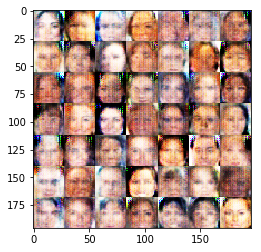

Epoch 1/1... Discriminator Loss: 0.8507... Generator Loss: 1.1637
Epoch 1/1... Discriminator Loss: 0.8525... Generator Loss: 1.1267
Epoch 1/1... Discriminator Loss: 0.6216... Generator Loss: 1.7613
Epoch 1/1... Discriminator Loss: 0.7464... Generator Loss: 4.1803
Epoch 1/1... Discriminator Loss: 0.5909... Generator Loss: 2.3392
Epoch 1/1... Discriminator Loss: 1.2121... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 0.7601... Generator Loss: 2.8631
Epoch 1/1... Discriminator Loss: 0.6217... Generator Loss: 1.7768
Epoch 1/1... Discriminator Loss: 2.6386... Generator Loss: 3.9369
Epoch 1/1... Discriminator Loss: 0.8265... Generator Loss: 1.3304


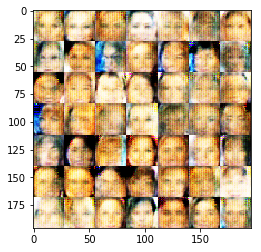

Epoch 1/1... Discriminator Loss: 0.7051... Generator Loss: 2.4507
Epoch 1/1... Discriminator Loss: 1.1795... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 2.6729
Epoch 1/1... Discriminator Loss: 0.6636... Generator Loss: 1.6295
Epoch 1/1... Discriminator Loss: 0.6799... Generator Loss: 1.5591
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 1.7233
Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.4717
Epoch 1/1... Discriminator Loss: 0.6135... Generator Loss: 1.7727
Epoch 1/1... Discriminator Loss: 0.6727... Generator Loss: 1.5250
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 3.2320


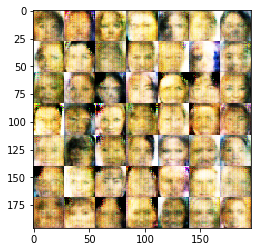

Epoch 1/1... Discriminator Loss: 0.4763... Generator Loss: 2.7075
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 1.1374
Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 6.8183
Epoch 1/1... Discriminator Loss: 0.9696... Generator Loss: 0.9118
Epoch 1/1... Discriminator Loss: 1.4624... Generator Loss: 0.4656
Epoch 1/1... Discriminator Loss: 0.6922... Generator Loss: 2.5334
Epoch 1/1... Discriminator Loss: 0.6838... Generator Loss: 2.3236
Epoch 1/1... Discriminator Loss: 0.8218... Generator Loss: 2.0398
Epoch 1/1... Discriminator Loss: 0.6466... Generator Loss: 1.7574
Epoch 1/1... Discriminator Loss: 2.3897... Generator Loss: 5.3996


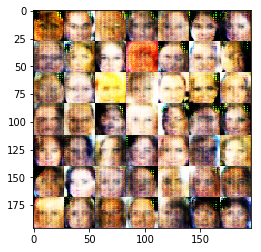

Epoch 1/1... Discriminator Loss: 0.6914... Generator Loss: 1.6787
Epoch 1/1... Discriminator Loss: 1.2248... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 0.7252... Generator Loss: 1.9856
Epoch 1/1... Discriminator Loss: 0.7886... Generator Loss: 1.2911
Epoch 1/1... Discriminator Loss: 0.8931... Generator Loss: 1.4639
Epoch 1/1... Discriminator Loss: 1.0808... Generator Loss: 0.7380
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 3.6524
Epoch 1/1... Discriminator Loss: 0.5460... Generator Loss: 2.0760
Epoch 1/1... Discriminator Loss: 1.6104... Generator Loss: 0.3877


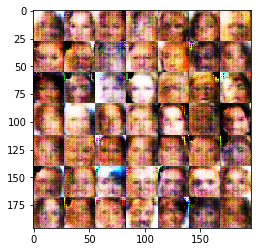

Epoch 1/1... Discriminator Loss: 0.8017... Generator Loss: 2.3289
Epoch 1/1... Discriminator Loss: 0.9311... Generator Loss: 1.1215
Epoch 1/1... Discriminator Loss: 0.7550... Generator Loss: 1.5723
Epoch 1/1... Discriminator Loss: 0.6880... Generator Loss: 2.0762
Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 2.5542
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 0.8463
Epoch 1/1... Discriminator Loss: 0.9853... Generator Loss: 2.3913
Epoch 1/1... Discriminator Loss: 0.6839... Generator Loss: 1.4673


In [17]:
batch_size = 128
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.